00. **Preparação para Execução do Ambiente**
*- Garantir que as dependências estejam presentes*

In [9]:
import pyettj.ettj as ettj
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import warnings

# Supressão de warnings para limpeza de output corporativo
warnings.filterwarnings('ignore')

# Configurações estéticas para apresentações executivas
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

**01. Captura de Dados**

A Curva DI x PRÉ é o nosso benchmark aqui, representando a expectativa de mercado sobre a taxa Selic no horizonte dos contratos futuros


In [11]:
def fetch_yield_curve(ref_date):
    """
    Captura a ETTJ para uma data específica.
    Fonte: B3/ANBIMA
    """
    try:
        df_raw = ettj.get_ettj(ref_date)
        # Selecionamos apenas as colunas core para evitar redundância de memória
        columns_of_interest = ['Dias Corridos', 'DI x pré 252']
        return df_raw[columns_of_interest].copy()
    except Exception as e:
        print(f"[ERRO] Falha na captura dos dados para a data {ref_date}: {e}")
        return None

# Definição da data de análise (conforme base histórica)
DATA_REFERENCIA = '04/01/2010'
df_curva = fetch_yield_curve(DATA_REFERENCIA)

if df_curva is not None:
    print(f"Dados carregados com sucesso para {DATA_REFERENCIA}.")
    display(df_curva.head())

Curvas capturadas em 3.71 segundos.
Dados carregados com sucesso para 04/01/2010.


,Dias Corridos,DI x pré 252
0,1,8.61000
0,11,8.63000
0,28,8.63000
0,30,8.64000
0,44,8.68000


**02. Modelagem Estatística: Regressão Simples**

Questionamos a linearidade da curva de juros no curto prazo. Para fins de sensibilidade, aplicamos uma regressão linear simples onde os Dias Corridos (X) explicam a Taxa (Y). Embora a curva raramente é linear (apresentando curvatura e convexidade), a regressão serve como um indicador de slope (inclinação).

In [12]:
# Preparação dos vetores (Reshaping para o scikit-learn)
X = df_curva['Dias Corridos'].values.reshape(-1, 1)
y = df_curva['DI x pré 252'].values

# Instanciação e Fit do Modelo
model = LinearRegression()
model.fit(X, y)

# Métricas de Performance
r_squared = model.score(X, y)
intercept = model.intercept_
slope = model.coef_[0]

print(f"--- Output do Modelo ---")
print(f"Coeficiente de Determinação (R²): {r_squared:.4f}")
print(f"Intercepto (Taxa Base): {intercept:.4f}")
print(f"Slope (Inclinação da Curva): {slope:.6f}")

--- Output do Modelo ---
Coeficiente de Determinação (R²): 0.5942
Intercepto (Taxa Base): 10.6324
Slope (Inclinação da Curva): 0.000695


**03. Visualização de Dados e Diagnóstico**

Aqui, contrastamos a curva real com a linha de tendência projetada.

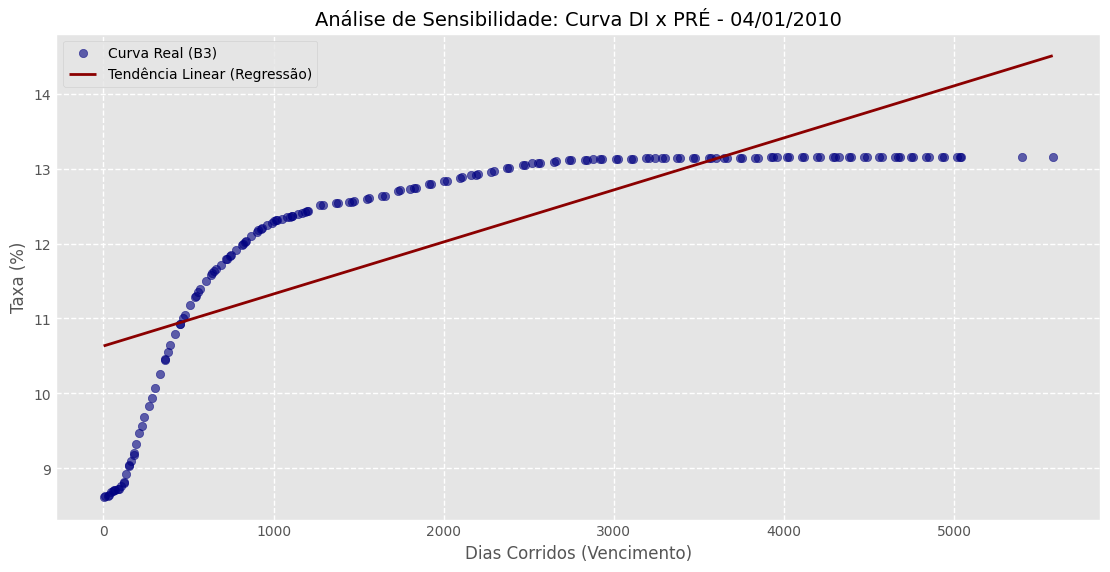

In [13]:
plt.scatter(X, y, color='navy', label='Curva Real (B3)', alpha=0.6)
plt.plot(X, model.predict(X), color='darkred', linewidth=2, label='Tendência Linear (Regressão)')

plt.title(f'Análise de Sensibilidade: Curva DI x PRÉ - {DATA_REFERENCIA}', fontsize=14)
plt.xlabel('Dias Corridos (Vencimento)', fontsize=12)
plt.ylabel('Taxa (%)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--')
plt.show()